In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = "C:\\Users\\gaoch\\MA\\Badminton weights\\P01_B\\"
CHOSEN_SEGMENT = "Right Hand "
BASE_SEGMENT = "Right Shoulder "
SHEET_NAME = ["Segment Position", "Segment Velocity", "Segment Acceleration"]

In [2]:
def read_data(file_name):
    # return pd.read_excel(DATA_PATH + file_name,
    #                      sheet_name = SHEET_NAME,
    #                      usecols=[CHOSEN_SEGMENT + "x", CHOSEN_SEGMENT + "y", CHOSEN_SEGMENT + "z", BASE_SEGMENT + "x",
    #                               BASE_SEGMENT + "y", BASE_SEGMENT + "z"])
    return pd.read_excel(DATA_PATH + file_name,
                         sheet_name = SHEET_NAME)

dict_no_weight_0 = read_data("P01_B_noweightwithgloves.xlsx")
dict_no_weight_1 = read_data("P01_B_noweightwithoutgloves.xlsx")

#dict_with_weight_0 = read_data("P01_B_withweightnogloves.xlsx")
dict_with_weight_1 = read_data("P01_B_withweightnogloves2.xlsx")
dict_with_weight_2 = read_data("P01_B_withweightwithgloves.xlsx")


In [3]:
# list_no_weight = []
# list_no_weight.append(df_no_weight_0[7400:12100])
# list_no_weight.append(df_no_weight_1[7300:11800])
#
#
# list_with_weight = []
# list_with_weight.append(df_with_weight_1[6000:10500])
# list_with_weight.append(df_with_weight_2[8500:13200])
#
# series_no_weight = pd.Series(list_no_weight)
# series_with_weight = pd.Series(list_with_weight)

In [16]:
df_no_weight_highServe_0 = {}
df_no_weight_highServe_0["Segment Velocity"] = dict_no_weight_0["Segment Velocity"].loc[7400:12100, [CHOSEN_SEGMENT+"x", CHOSEN_SEGMENT+"y", CHOSEN_SEGMENT+"z", BASE_SEGMENT+"x", BASE_SEGMENT+"y", BASE_SEGMENT+"z"]]
df_no_weight_highServe_0["Segment Acceleration"] = dict_no_weight_0["Segment Acceleration"].loc[7400:12100, [CHOSEN_SEGMENT+"x", CHOSEN_SEGMENT+"y", CHOSEN_SEGMENT+"z", BASE_SEGMENT+"x", BASE_SEGMENT+"y", BASE_SEGMENT+"z"]]
df_no_weight_highServe_0["Segment Position"] = dict_no_weight_0["Segment Position"].loc[7400:12100, [CHOSEN_SEGMENT+"x", CHOSEN_SEGMENT+"y", CHOSEN_SEGMENT+"z", BASE_SEGMENT+"x", BASE_SEGMENT+"y", BASE_SEGMENT+"z"]]

df_no_weight_highServe_1 = {}
df_no_weight_highServe_1["Segment Velocity"] = dict_no_weight_1["Segment Velocity"].loc[7300:11800, [CHOSEN_SEGMENT+"x", CHOSEN_SEGMENT+"y", CHOSEN_SEGMENT+"z", BASE_SEGMENT+"x", BASE_SEGMENT+"y", BASE_SEGMENT+"z"]]
df_no_weight_highServe_1["Segment Acceleration"] = dict_no_weight_1["Segment Acceleration"].loc[7300:11800, [CHOSEN_SEGMENT+"x", CHOSEN_SEGMENT+"y", CHOSEN_SEGMENT+"z", BASE_SEGMENT+"x", BASE_SEGMENT+"y", BASE_SEGMENT+"z"]]

df_with_weight_highServe_0 = {}
df_with_weight_highServe_0["Segment Velocity"] = dict_with_weight_1["Segment Velocity"].loc[6000:10500, [CHOSEN_SEGMENT+"x", CHOSEN_SEGMENT+"y", CHOSEN_SEGMENT+"z", BASE_SEGMENT+"x", BASE_SEGMENT+"y", BASE_SEGMENT+"z"]]
df_with_weight_highServe_0["Segment Acceleration"] = dict_with_weight_1["Segment Acceleration"].loc[6000:10500, [CHOSEN_SEGMENT+"x", CHOSEN_SEGMENT+"y", CHOSEN_SEGMENT+"z", BASE_SEGMENT+"x", BASE_SEGMENT+"y", BASE_SEGMENT+"z"]]

df_with_weight_highServe_1 = {}
df_with_weight_highServe_1["Segment Velocity"] = dict_with_weight_2["Segment Velocity"].loc[8500:13200, [CHOSEN_SEGMENT+"x", CHOSEN_SEGMENT+"y", CHOSEN_SEGMENT+"z", BASE_SEGMENT+"x", BASE_SEGMENT+"y", BASE_SEGMENT+"z"]]
df_with_weight_highServe_1["Segment Acceleration"] = dict_with_weight_2["Segment Acceleration"].loc[8500:13200, [CHOSEN_SEGMENT+"x", CHOSEN_SEGMENT+"y", CHOSEN_SEGMENT+"z", BASE_SEGMENT+"x", BASE_SEGMENT+"y", BASE_SEGMENT+"z"]]


In [17]:
print(df_with_weight_highServe_0["Segment Velocity"] )

       Right Hand x  Right Hand y  Right Hand z  Right Shoulder x  \
6000       0.960163      0.260110     -0.029517          0.842825   
6001       0.953378      0.250758     -0.025830          0.846149   
6002       0.946889      0.241925     -0.022177          0.849188   
6003       0.940670      0.233534     -0.018575          0.851961   
6004       0.934695      0.225508     -0.015039          0.854486   
...             ...           ...           ...               ...   
10496      0.380402      0.124179      0.108342          0.370741   
10497      0.359710      0.148264      0.121203          0.368604   
10498      0.340026      0.171169      0.132871          0.365958   
10499      0.321846      0.192340      0.143085          0.362675   
10500      0.305664      0.211226      0.151585          0.358622   

       Right Shoulder y  Right Shoulder z  
6000          -0.092243         -0.042601  
6001          -0.100197         -0.045219  
6002          -0.107984         -0.0478

In [18]:
# df_with_weight_velocity = df_with_weight_2["Segment Velocity"].loc[8500:13200, [CHOSEN_SEGMENT+"x", CHOSEN_SEGMENT+"y", CHOSEN_SEGMENT+"z"]]
#
# df_with_weight_acceleration = df_with_weight_2["Segment Acceleration"].loc[8500:13200, [CHOSEN_SEGMENT+"x", CHOSEN_SEGMENT+"y", CHOSEN_SEGMENT+"z"]]

In [19]:

def euclidean_distance(data):
    distance = -1
    if data.shape[0] == 6:
        distance = np.sqrt(sum(np.power(np.subtract(data[[CHOSEN_SEGMENT+"x",CHOSEN_SEGMENT+"y",CHOSEN_SEGMENT+"z"]].values, data[[BASE_SEGMENT+"x", BASE_SEGMENT+"y", BASE_SEGMENT+"z"]].values),2)))
    elif data.shape[0] == 3:
        distance = np.sqrt(sum(np.power(data[[CHOSEN_SEGMENT+"x",CHOSEN_SEGMENT+"y",CHOSEN_SEGMENT+"z"]],2)))
    return distance

def calculate_result_vector(data):
    data.loc[:,"result vector"] = \
        data.apply(euclidean_distance, axis=1)
# series_no_weight.apply(calculate_result_vector)
# series_with_weight.apply(calculate_result_vector)

def deal_all_sheets(data):
    for sheet in data.values():
        calculate_result_vector(sheet)

deal_all_sheets(df_no_weight_highServe_0)
deal_all_sheets(df_no_weight_highServe_1)
deal_all_sheets(df_with_weight_highServe_0)
deal_all_sheets(df_with_weight_highServe_1)


df_no_weight_highServe_0["Segment Velocity"].loc[:,"relative velocity"] = np.true_divide(df_no_weight_highServe_0["Segment Velocity"].loc[:, "result vector"], df_no_weight_highServe_0["Segment Position"].loc[:, "result vector"])



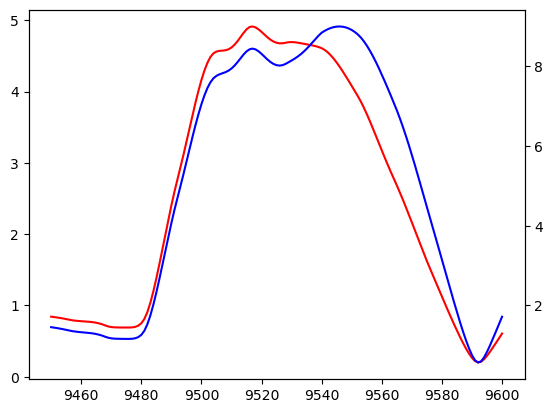

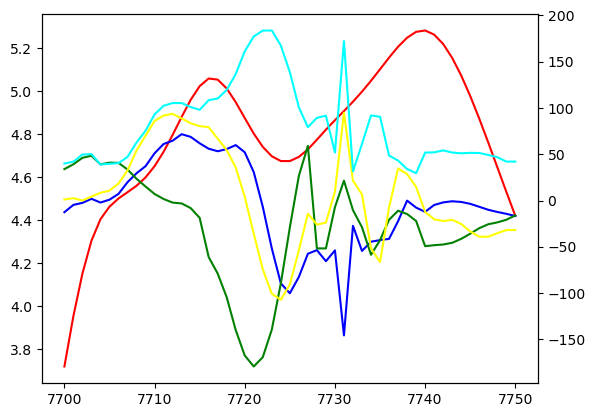

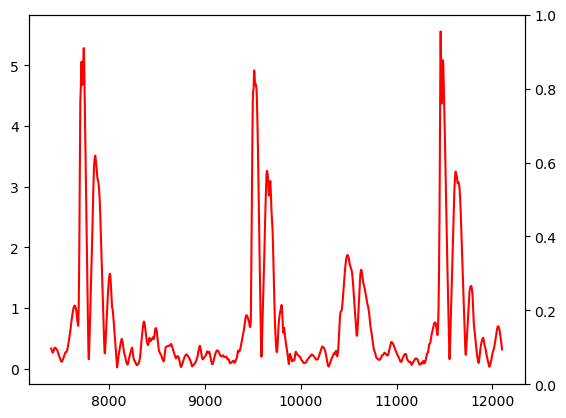

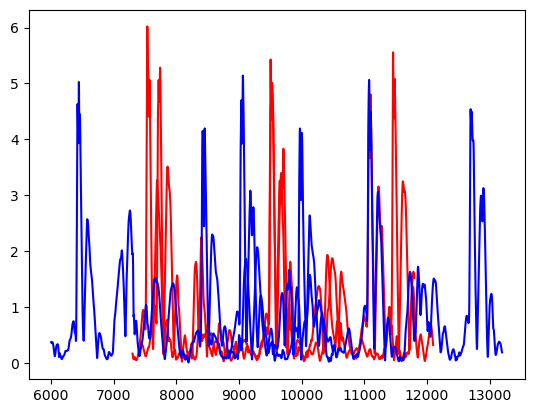

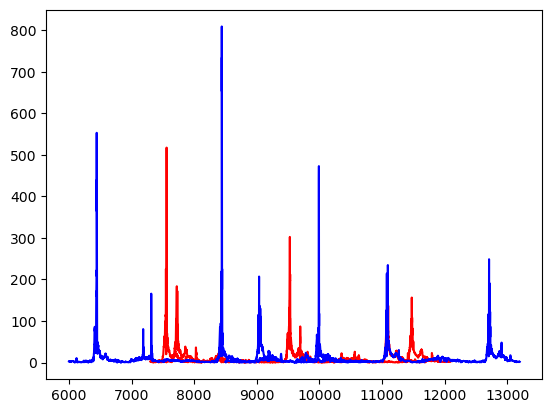

In [30]:
# for hit in series_no_weight:
#     plt.plot(hit["result vector"], color="red")
#
# for hit in series_with_weight:
#     plt.plot(hit["result vector"], color="blue")

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df_no_weight_highServe_0["Segment Velocity"].loc[9450:9600, "result vector"], color="red")
ax2.plot(df_no_weight_highServe_0["Segment Velocity"].loc[9450:9600, "relative velocity"], color="blue")
# ax2.plot(df_no_weight_acceleration.loc[7600:7800, CHOSEN_SEGMENT+"y"], color="blue")
# ax2.plot(df_no_weight_acceleration.loc[7600:7800, CHOSEN_SEGMENT+"x"], color="green")
# ax2.plot(df_no_weight_acceleration.loc[7600:7800, CHOSEN_SEGMENT+"z"], color="yellow")
plt.show()

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df_no_weight_highServe_0["Segment Velocity"].loc[7700:7750:, "result vector"], color="red")
ax2.plot(df_no_weight_highServe_0["Segment Acceleration"].loc[7700:7750, CHOSEN_SEGMENT+"y"], color="blue")
ax2.plot(df_no_weight_highServe_0["Segment Acceleration"].loc[7700:7750, CHOSEN_SEGMENT+"x"], color="green")
ax2.plot(df_no_weight_highServe_0["Segment Acceleration"].loc[7700:7750, CHOSEN_SEGMENT+"z"], color="yellow")
ax2.plot(df_no_weight_highServe_0["Segment Acceleration"].loc[7700:7750, "result vector"], color="cyan")
plt.show()

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df_no_weight_highServe_0["Segment Velocity"].loc[:, "result vector"], color="red")
plt.show()


fig,ax1 = plt.subplots()
ax1.plot(df_no_weight_highServe_0["Segment Velocity"].loc[:, "result vector"], color="red")
ax1.plot(df_no_weight_highServe_1["Segment Velocity"].loc[:, "result vector"], color="red")
ax1.plot(df_with_weight_highServe_0["Segment Velocity"].loc[:, "result vector"], color="blue")
ax1.plot(df_with_weight_highServe_1["Segment Velocity"].loc[:, "result vector"], color="blue")
plt.show()

fig,ax1 = plt.subplots()
ax1.plot(df_no_weight_highServe_0["Segment Acceleration"].loc[:, "result vector"], color="red")
ax1.plot(df_no_weight_highServe_1["Segment Acceleration"].loc[:, "result vector"], color="red")
ax1.plot(df_with_weight_highServe_0["Segment Acceleration"].loc[:, "result vector"], color="blue")
ax1.plot(df_with_weight_highServe_1["Segment Acceleration"].loc[:, "result vector"], color="blue")
plt.show()




In [14]:
print(df_with_weight_highServe_0["Segment Velocity"] )

KeyError: 'Segment Velocity'